# Examine `.pz` File Data

A Jupyter notebook to load a `.pz` file and examine the `usgs_test_original` array.

## Import Required Libraries
Import libraries such as NumPy and Matplotlib for file loading and visualization.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os # Import os to construct file paths reliably

## Load the `.pz` File
Use NumPy's load function to load the test `.pz` file and extract its contents. Make sure the `.pz` file is in the same directory or provide the correct path.

In [52]:
# Define the path to the .pz file
# IMPORTANT: Replace 'your_test_file.pz' with the actual filename.
file_name = 'data/processed/test/20380357.npz' # Example filename, change if needed
file_path = os.path.join('.', file_name) # Assumes file is in the same directory as the notebook

# Check if the file exists before attempting to load
if os.path.exists(file_path):
    # Load the .pz file
    try:
        loaded_data = np.load(file_path, allow_pickle=True)
        print(f"Successfully loaded '{file_name}'.")
        # List the arrays contained within the file
        print("Arrays in file:", list(loaded_data.keys()))
    except Exception as e:
        print(f"Error loading file '{file_name}': {e}")
        loaded_data = None
else:
    print(f"Error: File not found at '{file_path}'")
    loaded_data = None

Successfully loaded 'data/processed/test/20380357.npz'.
Arrays in file: ['X_test', 'y_test_scaled', 'nwm_test_original', 'usgs_test_original', 'test_timestamps']


## Examine the `usgs_test_original` Array
Access the `usgs_test_original` array from the loaded file and print its shape, data type, and a sample of its values.

In [53]:
# Check if data was loaded successfully and the key exists
if loaded_data is not None and 'usgs_test_original' in loaded_data:
    # Access the array
    usgs_test_original = loaded_data['usgs_test_original']

    # Print shape and data type
    print("Shape of 'usgs_test_original':", usgs_test_original.shape)
    print("Data type of 'usgs_test_original':", usgs_test_original.dtype)

    # Print a sample of the values (e.g., the first 5 elements/rows)
    print("\nSample values (first 5 elements/rows):")
    # Adjust slicing based on the array's dimensions
    if usgs_test_original.ndim == 1:
        print(usgs_test_original[:5])
    elif usgs_test_original.ndim >= 2:
        print(usgs_test_original[:5, ...]) # Print first 5 rows, all columns
    else:
        print(usgs_test_original) # Print the whole array if 0-dim

    # Close the file handle
    loaded_data.close()
elif loaded_data is not None:
    print("Error: 'usgs_test_original' key not found in the loaded file.")
    print("Available keys:", list(loaded_data.keys()))
    loaded_data.close()
else:
    print("Cannot examine array because the file was not loaded.")

Shape of 'usgs_test_original': (4869, 18)
Data type of 'usgs_test_original': float64

Sample values (first 5 elements/rows):
[[0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069
  0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069
  0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069]
 [0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069
  0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069
  0.00453069 0.00453069 0.00453069 0.00453069 0.00453069 0.00453069]
 [0.00474306 0.00474306 0.00474306 0.00474306 0.00474306 0.00474306
  0.00474306 0.00474306 0.00474306 0.00474306 0.00474306 0.00474306
  0.00474306 0.00474306 0.00474306 0.00474306 0.00474306 0.00474306]
 [0.00481386 0.00481386 0.00481386 0.00481386 0.00481386 0.00481386
  0.00481386 0.00481386 0.00481386 0.00481386 0.00481386 0.00481386
  0.00481386 0.00481386 0.00481386 0.00481386 0.00481386 0.00481386]
 [0.00481386 0.00481386 0.00481386 0.00481386 0.0048138

## Visualize the Array
Use Matplotlib to create a visualization (e.g., a heatmap or image) of the `usgs_test_original` array. This is most effective for 2D arrays.


Visualizing the array as a heatmap...


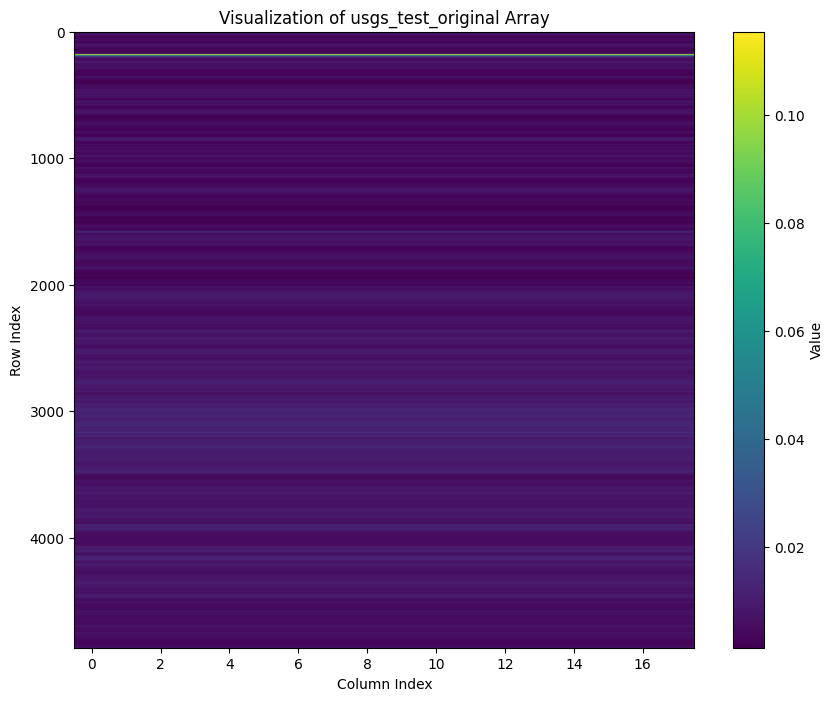

In [54]:
# Check if the array exists and is suitable for visualization (e.g., 2D)
if 'usgs_test_original' in locals() and isinstance(usgs_test_original, np.ndarray):
    if usgs_test_original.ndim == 2:
        print("\nVisualizing the array as a heatmap...")
        plt.figure(figsize=(10, 8))
        plt.imshow(usgs_test_original, aspect='auto', cmap='viridis') # 'viridis' is a common colormap
        plt.colorbar(label='Value')
        plt.title('Visualization of usgs_test_original Array')
        plt.xlabel('Column Index')
        plt.ylabel('Row Index')
        plt.show()
    elif usgs_test_original.ndim == 1:
        print("\nVisualizing the array as a line plot...")
        plt.figure(figsize=(12, 4))
        plt.plot(usgs_test_original)
        plt.title('Visualization of usgs_test_original Array (1D)')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()
    else:
        print(f"\nArray has {usgs_test_original.ndim} dimensions. Visualization might not be straightforward.")
        print("Consider reshaping or selecting slices for visualization.")
else:
    print("\nCannot visualize because 'usgs_test_original' array is not available or not loaded correctly.")

# Inspect Processed Test Data (.npz)

This notebook loads a processed test data file (`.npz`) and examines the `usgs_test_original` array to understand its characteristics, particularly looking for zero values or other anomalies that might explain issues seen in evaluation plots.

In [55]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# --- Configuration ---
# Define the station ID to inspect
station_id = '20380357' # Options: '21609641', '20380357'

# Define paths relative to the notebook location
# Assuming the notebook is in the root of the project
PROJECT_ROOT = os.getcwd() # Get current working directory
PROCESSED_DATA_DIR = os.path.join(PROJECT_ROOT, 'data', 'processed')

file_path = os.path.join(PROCESSED_DATA_DIR, 'test', f"{station_id}.npz")

print(f"Looking for file at: {file_path}")

Looking for file at: /Users/mitchelcarson/Desktop/CS 4440 AI/lstm_transformer/Runoff_Forcasting/data/processed/test/20380357.npz


In [57]:
# --- Load and Inspect Data ---
try:
    data = np.load(file_path, allow_pickle=True)
    print(f"Successfully loaded: {file_path}")
    print(f"\nAvailable keys in the file: {list(data.keys())}")

    if 'usgs_test_original' in data:
        usgs_original = data['usgs_test_original']
        print(f"\nShape of usgs_test_original: {usgs_original.shape}")

        # Convert to DataFrame for easier analysis
        # Columns represent lead times (1h to 18h)
        lead_times = [f"lead_{i}h" for i in range(1, usgs_original.shape[1] + 1)]
        usgs_df = pd.DataFrame(usgs_original, columns=lead_times)

        print("\nBasic statistics for usgs_test_original (each column is a lead time):")
        # Use display for better formatting in notebooks
        from IPython.display import display
        display(usgs_df.describe())

        # Check for zero values
        zero_counts = (usgs_df == 0).sum()
        print("\nCounts of zero values per lead time:")
        print(zero_counts)

        # Check for NaN values
        nan_counts = usgs_df.isna().sum()
        print("\nCounts of NaN values per lead time:")
        print(nan_counts)

        # Check for negative values
        negative_counts = (usgs_df < 0).sum()
        print("\nCounts of negative values per lead time:")
        print(negative_counts)

    else:
        print("\nError: Key 'usgs_test_original' not found in the file.")

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded: /Users/mitchelcarson/Desktop/CS 4440 AI/lstm_transformer/Runoff_Forcasting/data/processed/test/20380357.npz

Available keys in the file: ['X_test', 'y_test_scaled', 'nwm_test_original', 'usgs_test_original', 'test_timestamps']

Shape of usgs_test_original: (4869, 18)

Basic statistics for usgs_test_original (each column is a lead time):


,lead_1h,lead_2h,lead_3h,lead_4h,lead_5h,lead_6h,lead_7h,lead_8h,lead_9h,lead_10h,lead_11h,lead_12h,lead_13h,lead_14h,lead_15h,lead_16h,lead_17h,lead_18h
count,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000,4869.000000
mean,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004,0.007004
std,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913,0.004913
min,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416,0.001416
25%,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672,0.004672
50%,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584,0.006584
75%,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778,0.008778
max,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320,0.115320



Counts of zero values per lead time:
lead_1h     0
lead_2h     0
lead_3h     0
lead_4h     0
lead_5h     0
lead_6h     0
lead_7h     0
lead_8h     0
lead_9h     0
lead_10h    0
lead_11h    0
lead_12h    0
lead_13h    0
lead_14h    0
lead_15h    0
lead_16h    0
lead_17h    0
lead_18h    0
dtype: int64

Counts of NaN values per lead time:
lead_1h     0
lead_2h     0
lead_3h     0
lead_4h     0
lead_5h     0
lead_6h     0
lead_7h     0
lead_8h     0
lead_9h     0
lead_10h    0
lead_11h    0
lead_12h    0
lead_13h    0
lead_14h    0
lead_15h    0
lead_16h    0
lead_17h    0
lead_18h    0
dtype: int64

Counts of negative values per lead time:
lead_1h     0
lead_2h     0
lead_3h     0
lead_4h     0
lead_5h     0
lead_6h     0
lead_7h     0
lead_8h     0
lead_9h     0
lead_10h    0
lead_11h    0
lead_12h    0
lead_13h    0
lead_14h    0
lead_15h    0
lead_16h    0
lead_17h    0
lead_18h    0
dtype: int64

Counts of negative values per lead time:
lead_1h     0
lead_2h     0
lead_3h     0
lead

## Visualize Distribution


Generating boxplot of USGS original values across lead times...


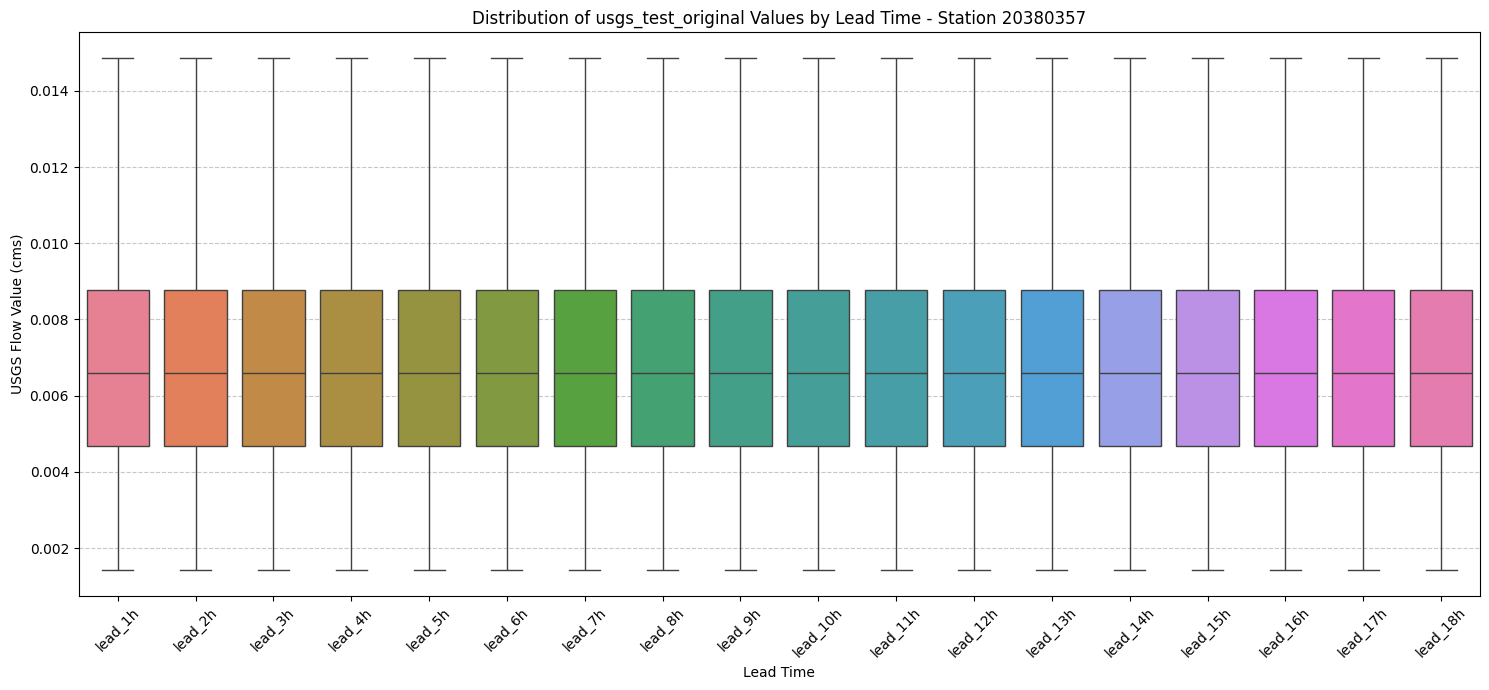


Generating histogram for the first lead time (lead_1h)...


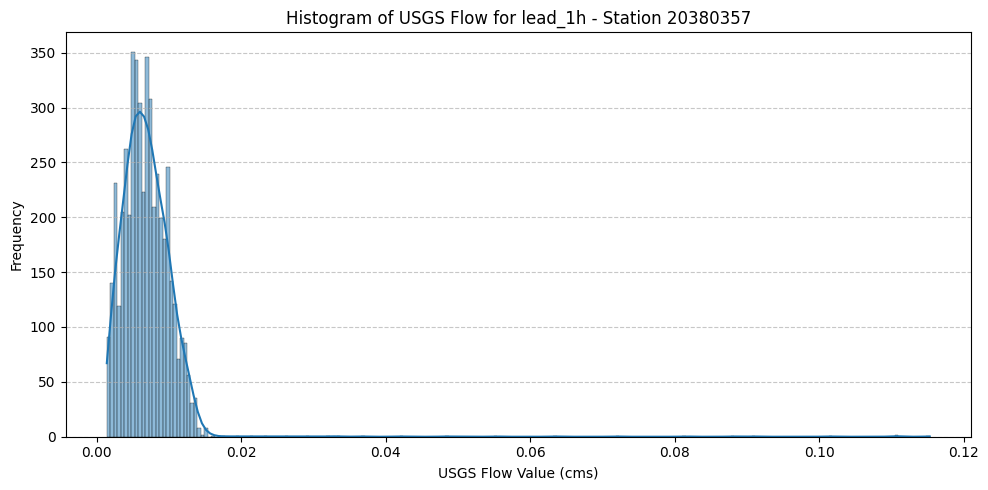

In [58]:
# --- Visualize Data Distribution (Optional) ---
if 'usgs_df' in locals(): # Check if the DataFrame was created successfully
    print("\nGenerating boxplot of USGS original values across lead times...")
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=usgs_df, showfliers=False) # showfliers=False matches evaluate.py
    plt.title(f"Distribution of usgs_test_original Values by Lead Time - Station {station_id}")
    plt.xlabel("Lead Time")
    plt.ylabel("USGS Flow Value (cms)")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Plot histogram for a specific lead time (e.g., first lead time)
    first_lead_time_col = usgs_df.columns[0]
    print(f"\nGenerating histogram for the first lead time ({first_lead_time_col})...")
    plt.figure(figsize=(10, 5))
    sns.histplot(usgs_df[first_lead_time_col].dropna(), kde=True)
    plt.title(f"Histogram of USGS Flow for {first_lead_time_col} - Station {station_id}")
    plt.xlabel("USGS Flow Value (cms)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping visualization because usgs_df was not created (likely due to file load error).")